# Theoretical review of Grover's algorithm
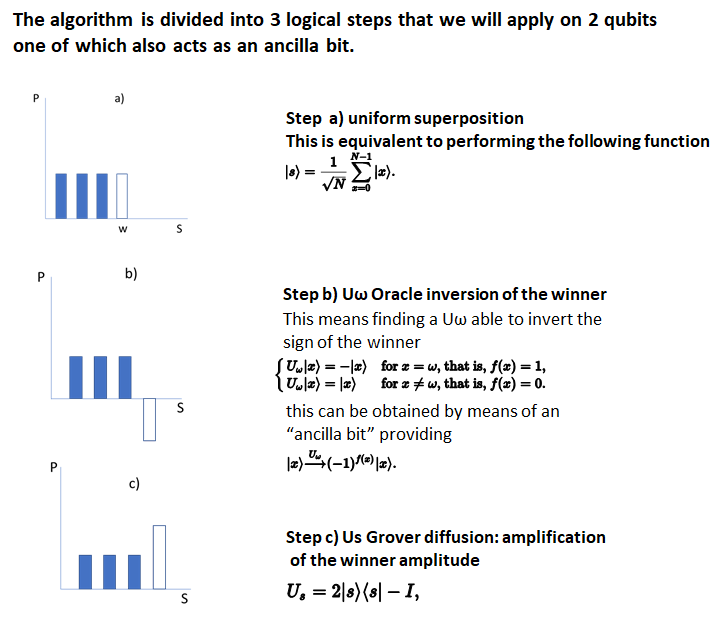

## the overall algorithm is as follows<a id='sectionB'></a>
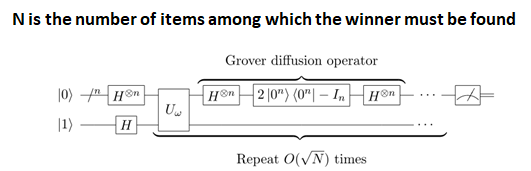

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Let's initialize the circuit<a id='sectionB'></a>

In [2]:
# 2 bit registry creation.
q = QuantumRegister(2, 'q')

# Circuit creation 
circ = QuantumCircuit(q)

Let's make the superposition
========================
## We apply a Hadamard gate to the two qubits realizing a superposition state <a id='sectionB'></a>

The circuit is displayed

In [3]:
# Application of the superposition to the whole system

q0_superposition=circ.h(q[0])
circ.h(q[1])
circ.barrier()
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram, plot_state
from qiskit.tools.visualization import iplot_histogram



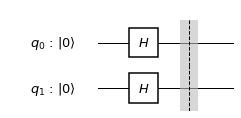

In [4]:
circuit_drawer(circ)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


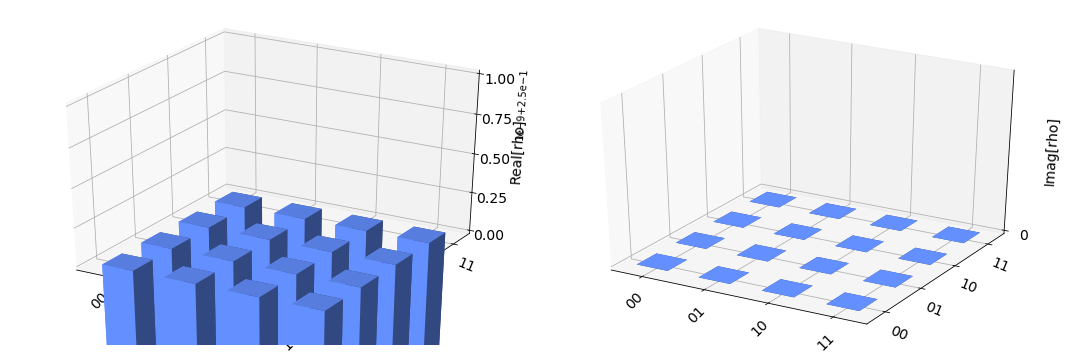

In [5]:
# execute the quantum circuit 
from qiskit.tools.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere

# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(circ, backend).result()
state_superposition  = result.get_statevector(circ)
print(state_superposition)

plot_state_city(state_superposition)

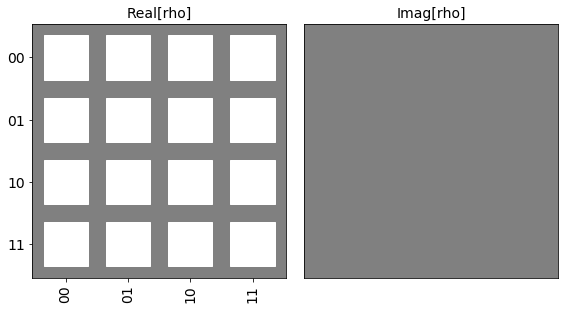

In [6]:
plot_state_hinton(state_superposition)

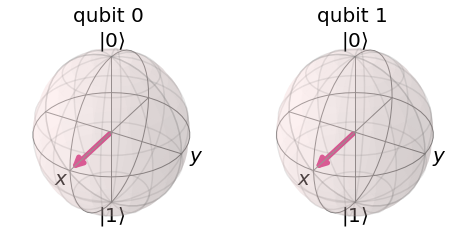

In [7]:
plot_bloch_multivector(state_superposition)

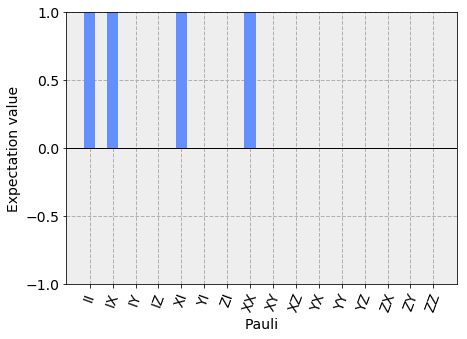

In [8]:
plot_state_paulivec(state_superposition)


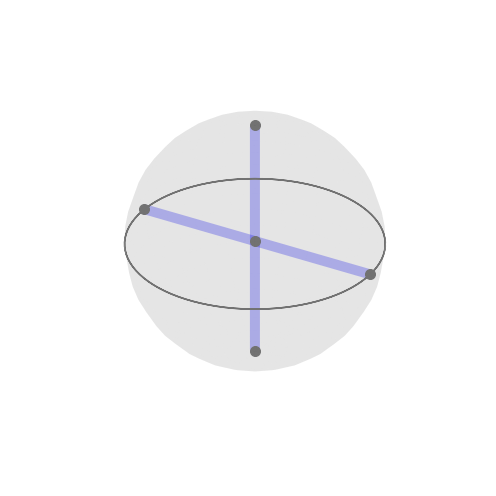

In [9]:
plot_state_qsphere(state_superposition)


Let's make the Oracle for first winner |00>
==================================

The circuit is displayed

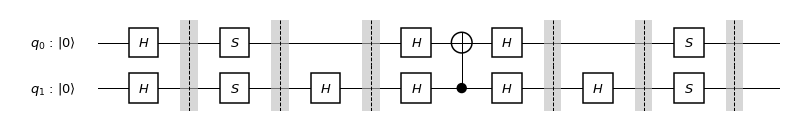

In [10]:
		circ.s(q[0])
		circ.s(q[1])
		circ.barrier()        
		circ.h(q[1])
		circ.barrier()        
		circ.h(q[0])
		circ.h(q[1])
		circ.cx(q[1], q[0])
		circ.h(q[0])
		circ.h(q[1])
		circ.barrier()        
		circ.h(q[1])
		circ.barrier()          
		circ.s(q[0])      
		circ.s(q[1])
		circ.barrier()
from qiskit.tools.visualization import circuit_drawer

circuit_drawer(circ)

## Let's create the Us function<a id='sectionB'></a>
which achieves a rotation with amplitude amplification
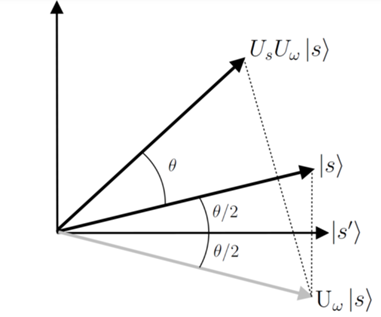

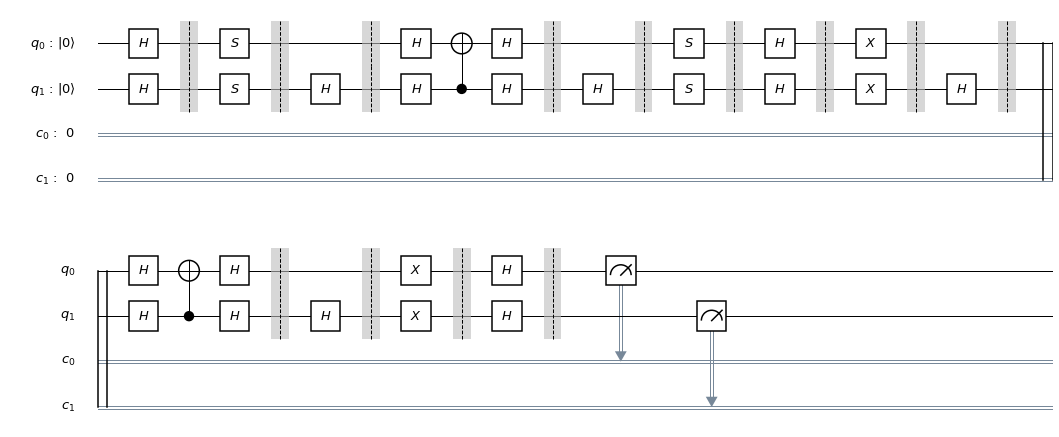

In [11]:
circ.h(q[0])
circ.h(q[1])
circ.barrier()
circ.x(q[0])
circ.x(q[1])
circ.barrier()

circ.h(q[1])
circ.barrier()
circ.h(q[0])
circ.h(q[1])
circ.cx(q[1], q[0])
circ.h(q[0])
circ.h(q[1])
circ.barrier()
circ.h(q[1])
circ.barrier()

circ.x(q[0])
circ.x(q[1])
circ.barrier()
circ.h(q[0])
circ.h(q[1])
circ.barrier()

# Create a Classical Register with 2 bits.
c = ClassicalRegister(2, 'c')
# Create a Quantum Circuit
meas = QuantumCircuit(q, c)
# map the quantum measurement to the classical bits
#meas.barrier ()
meas.measure(q,c)

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
circuit_drawer(qc)


## _*Let's use Grover Search for a 3SAT problem*_

In computer science the problem of Boolean satisfaction (sometimes called propositional satisfaction problem and abbreviated as SATISFABILITY or SAT) is the problem of determining whether there is an interpretation that meets a given Boolean formula. In other words, it asks if the variables of a given Boolean formula can be consistently replaced by TRUE or FALSE values so that the formula is globally TRUE. If this is the case, the formula is defined as satisfactory. On the other hand, if no such assignment exists, the function expressed by the formula is FALSE for all possible assignments of variables and the formula is unsatisfactory. For example, the formula "a AND NOT b" is satisfactory because you can find values a = TRUE and b = FALSE, which determines (a AND NOT b) = TRUE. On the contrary, "a AND NOT a" is unsatisfactory. 
This notebook demonstrates how to use the Grover algorithm of the Qiskit Aqua library and process the result.

More information is available at qiskit_aqua/readme.md repo


## _*3SAT  is an NP complete problem*_


We report the classification of the problems P vs NP
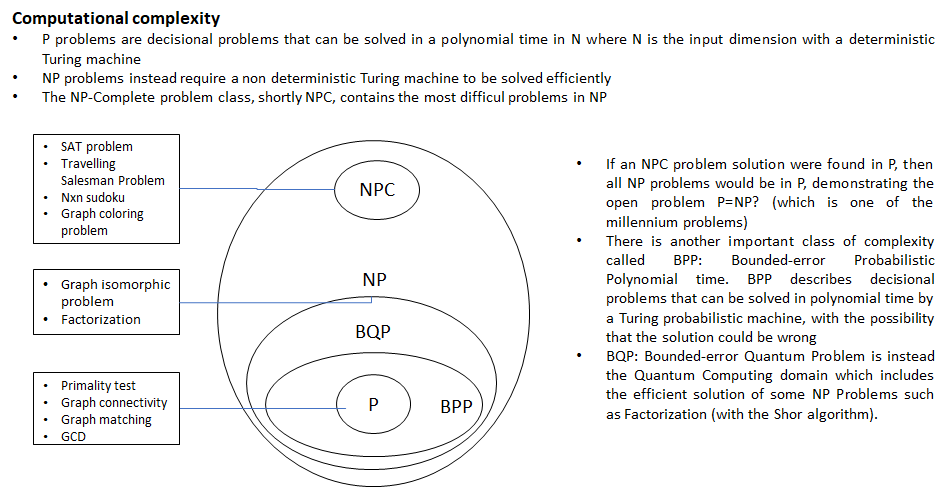

In [13]:
from qiskit import Aer
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.aqua.algorithms import Grover
from qiskit.visualization import plot_histogram

Let's assume a SAT problem for which we want to find solutions using the combination of Grover and SAT oracle. The SAT problem is specified in the DIMACS CNF format. 
If we look at the site https://people.sc.fsu.edu/~jburkardt/data/cnf/cnf.html we find that this simple 
example of Boolenan expression in 3 variables and 2 clauses (in which the variables are the x()and the clauses are OR and AND): 

      ( NOT x(1) OR ( NOT x(2) ) OR ( NOT x(3) ) )
       AND
      ( x(1) OR NOT ( x(2) ) OR x(3) )
       AND
      ( x(1) OR x(2) OR NOT ( x(3) ) )
       AND
      ( x(1) OR NOT ( x(2) ) OR NOT ( x(3) ) )
       AND
      ( NOT ( x(1) ) OR x(2) OR x(3) )
 
can be expressed in the form:

      c This is an example DIMACS 3-sat file with 3 satisfying solutions: 1 -2 3 0, -1 -2 -3 0, 1 2 -3 0
      c
      p cnf 3 5
      -1 -2 -3 0
      1 -2 3 0
      1 2 -3 0
      1 -2 -3 0
      -1 2 3 0
where:
- "c" stands for comment,
- "p" is used to describe the format, number of variables (3) and number of clauses (2),
- "-" represents the negation of the variable NOT x(3),
- "0" is a string terminator.

We assign the contents of the file to the variable sat_cnf taking care to end each line with \n

In [14]:
sat_cnf = "c  This is an example DIMACS 3-sat file with 3 satisfying solutions: 1 -2 3 0, -1 -2 -3 0, 1 2 -3 0\nc\np cnf 3 5\n-1 -2 -3 0\n1 -2 3 0\n1 2 -3 0\n1 -2 -3 0\n-1 2 3 0"

print(sat_cnf)

c  This is an example DIMACS 3-sat file with 3 satisfying solutions: 1 -2 3 0, -1 -2 -3 0, 1 2 -3 0
c
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


With this problem input, we create the corresponding oracle component:

In [15]:
backend = Aer.get_backend('qasm_simulator')
sat_oracle = LogicalExpressionOracle(sat_cnf)

The `oracle` can now be used to create an Grover instance:

In [18]:
aalgorithm = Grover(sat_oracle)
result = algorithm.run(backend)

We can then get the result:

In [19]:
print(result['result'])
print(result['measurement'])

[1, 2, -3]
{'011': 296, '000': 292, '111': 34, '001': 39, '100': 37, '010': 20, '101': 279, '110': 27}


As seen above, a satisfactory solution to the proposed SAT problem is obtained, with absolute values indicating variable indices and signs corresponding to the `True/False` assignments, in accordance with the DIMACS format.

The result shown above is the one with the highest probability, but also others with similar probability can satisfy the problem.

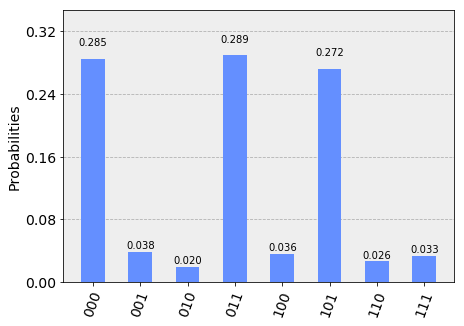

In [21]:
plot_histogram(result['measurement'])

Now you try to run a small problem SAT.
For example, find out what happens if you try

x(1) or not -x(2) and (-x(1) or x(2))